In [1]:
import sys
# на уровень выше из research_rank/
sys.path.insert(0, '..')
from pathlib import Path
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from plot_json import convert_dictlist_to_matrix
import matplotlib.pyplot as plt

(CVXPY) Aug 02 12:48:28 AM: Encountered unexpected exception importing solver MOSEK:
AttributeError("module 'mosek' has no attribute 'conetype'")


### Рассмотрим собственные значения $\rho_{max}$ и $\rho_{min}$ при взятии различных рангов при томографии на основе протокола Фёдорова

Изучим ранг состояний ро_макс и ро_мин. Для начала рассмотрим это для протокола Фёдорова. Рассмотрим 500 различных квантовых состояний с разными рангами с точностью $\epsilon = 10^{-6}$

Для томографии состояния с рангом 1 создадим таблицу df_r_1

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*

tomography_1 = ACT(protocol, 1, 3)

N = 500
svx_list = []         
rho_max_list = [0] * N
rho_min_list = [0] * N

# СЗ - собственное значение, И - измерение (количество используемых элементов протокола)
fed_r1 = {
    "СЗ 1, И 1": [],
    "СЗ 2, И 1": [],
    "СЗ 3, И 1": []
}


# Создание DataFrame
df_r_1 = pd.DataFrame(fed_r1)
df_r_1[""] = np.nan
df_r_1["СЗ 1, И 2"] = []
df_r_1["СЗ 2, И 2"] = []
df_r_1["СЗ 3, И 2"] = []
df_r_1[" "] = np.nan
df_r_1["СЗ 1, И 3"] = []
df_r_1["СЗ 2, И 3"] = []
df_r_1["СЗ 3, И 3"] = []

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
        x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=1, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
        eigenvalues, eigenvectors = np.linalg.eig(x_max_list[ind_max])
        match ind_max:
            case 0:
                df_r_1.loc[len(df_r_1), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_r_1.loc[len(df_r_1)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_r_1.loc[len(df_r_1)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])


 38%|███▊      | 190/500 [05:16<01:49,  2.82it/s]  /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 500/500 [15:00<00:00,  1.80s/it]  


Для томографии состояния с рангом 3 создадим таблицу df_r_3

In [ ]:
protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1))]
tomography = ACT(protocol, 1, 3)
x = np.array([1, 2, 3])
N = 500
svx_list = []         
rho_max_list = [0] * N
rho_min_list = [0] * N


fed_r3 = {
    "СЗ 1, И 1": [],
    "СЗ 2, И 1": [],
    "СЗ 3, И 1": []
}

# Создание DataFrame
df_r_3 = pd.DataFrame(fed_r3)
df_r_3[""] = np.nan
df_r_3["СЗ 1, И 2"] = []
df_r_3["СЗ 2, И 2"] = []
df_r_3["СЗ 3, И 2"] = []
df_r_3[" "] = np.nan
df_r_3["СЗ 1, И 3"] = []
df_r_3["СЗ 2, И 3"] = []
df_r_3["СЗ 3, И 3"] = []

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography.main(rank_psevdoin=3, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                       max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
        eigenvalues, eigenvectors = np.linalg.eig(x_max_list[ind_max])
        match ind_max:
            case 0:
                df_r_3.loc[len(df_r_3), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_r_3.loc[len(df_r_3)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_r_3.loc[len(df_r_3)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])


100%|██████████| 500/500 [02:42<00:00,  3.07it/s]


Объединяем их в одну таблицу exel под названием fed_eigenval_r_or_n

In [ ]:
# # Создаем пустые столбцы (3 штуки)
# empty_cols = pd.DataFrame(np.nan, index=df_r_1.index, columns=['   ', '    ', '  '])

# # Объединяем таблицы с пустыми столбцами между ними
# result = pd.concat([df_r_1, empty_cols, df_r_3], axis=1)

# # Запись в Excel
# result.to_excel("exel_file/fed_eigenval_r_or_n.xlsx", index=False, startrow=2)

#### Строим графики с этими собственными значениями

Для ранга 1

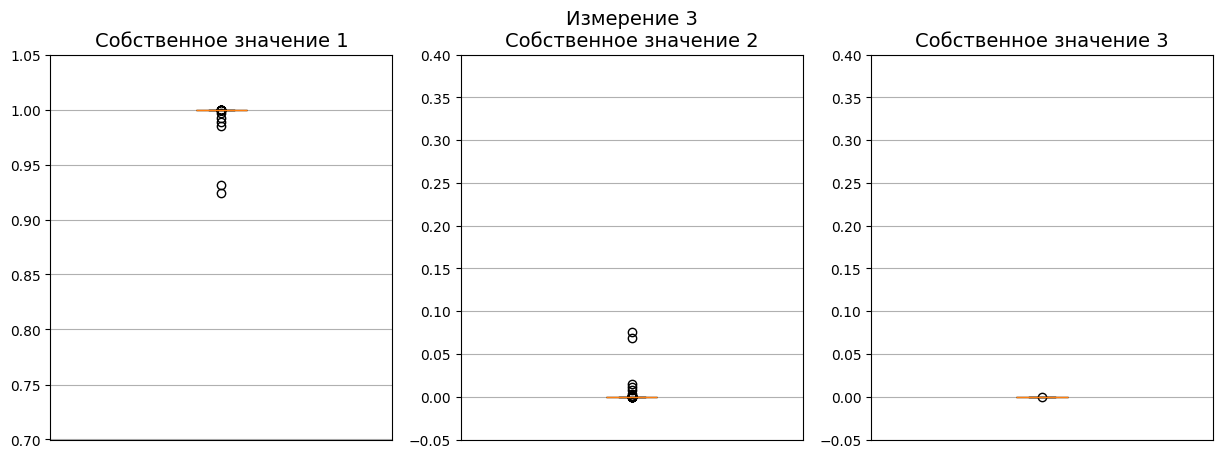

In [7]:
# Группируем колонки по измерениям (столбцы)
column_groups = [
    ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"],  # Измерение 1
    ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"],  # Измерение 2
    ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]   # Измерение 3
]

col_labels = ["СЗ 1", "СЗ 2", "СЗ 3"]
row_labels = ["Измерение 1", "Измерение 2", "Измерение 3"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(2,3):      # по измерениям (строки)
    for j in range(3):  # по СЗ (столбцы)
        ax = axes[j]
        col_name = column_groups[i][j]
        data = df_r_1[col_name].dropna()

        ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        
        # Заголовок для каждого графика — только название СЗ
        ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
        
        # Для центрального графика в строке (j == 1) добавляем подпись с измерением
        if j == 1:
            ax.set_title(f"{row_labels[i]}\nСобственное значение {col_labels[j][3]}", fontsize=14)
            

        if j == 0:
            ax.set_ylim([0.7, 1.05])
        else:
            ax.set_ylim([-0.05, 0.4])


        ax.grid(True)
        ax.set_xticks([])


# plt.tight_layout()
plt.show()


Для ранга 3

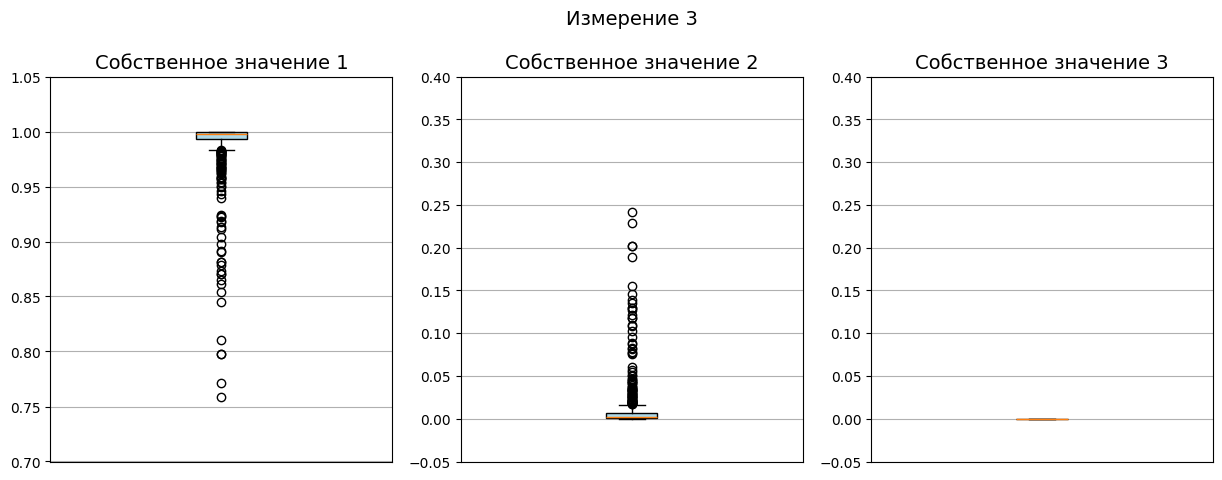

In [8]:
# Группируем колонки по измерениям (столбцы)
column_groups = [
    ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"],  # Измерение 1
    ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"],  # Измерение 2
    ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]   # Измерение 3
]

col_labels = ["СЗ 1", "СЗ 2", "СЗ 3"]
row_labels = ["Измерение 1", "Измерение 2", "Измерение 3"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(2, 3):      # по измерениям (строки)
    for j in range(3):  # по СЗ (столбцы)
        ax = axes[j]
        col_name = column_groups[i][j]
        data = df_r_3[col_name].dropna()

        ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))

        # Заголовок для каждого графика — только название СЗ
        ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
        # Для центрального графика в строке (j == 1) добавляем подпись с измерением
        if j == 1:
            ax.set_title(f"{row_labels[i]}\n\nСобственное значение {col_labels[j][3]}", fontsize=14)
            

        if j == 0:
            ax.set_ylim([0.7, 1.05])
        else:
            ax.set_ylim([-0.05, 0.4])


        ax.grid(True)
        ax.set_xticks([])


# plt.tight_layout()
plt.show()

### Рассмотрим собственные значения $\rho_{max}$ и $\rho_{min}$ на основе протокола с пластинкой $\frac{\lambda}{4}$

Изучим ранг состояний ро_макс и ро_мин. Для начала рассмотрим это для протокола Фёдорова. Рассмотрим 500 различных квантовых состояний с разными рангами с точностью $\epsilon = 10^{-6}$

Для томографии состояния с рангом 1 создадим таблицу df_start_protocol_r_1

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*

protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1))]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

N = 500
svx_list = []         
rho_max_list = [0] * N
rho_min_list = [0] * N

# СЗ - собственное значение, И - измерение (количество используемых элементов протокола)
fed_r1 = {
    "СЗ 1, И 1": [],
    "СЗ 2, И 1": [],
    "СЗ 3, И 1": []
}


# Создание DataFrame
df_start_protocol_r_1 = pd.DataFrame(fed_r1)
df_start_protocol_r_1[""] = np.nan
df_start_protocol_r_1["СЗ 1, И 2"] = []
df_start_protocol_r_1["СЗ 2, И 2"] = []
df_start_protocol_r_1["СЗ 3, И 2"] = []
df_start_protocol_r_1[" "] = np.nan
df_start_protocol_r_1["СЗ 1, И 3"] = []
df_start_protocol_r_1["СЗ 2, И 3"] = []
df_start_protocol_r_1["СЗ 3, И 3"] = []
df_start_protocol_r_1[" "] = np.nan
df_start_protocol_r_1["СЗ 1, И 4"] = []
df_start_protocol_r_1["СЗ 2, И 4"] = []
df_start_protocol_r_1["СЗ 3, И 4"] = []
df_start_protocol_r_1[" "] = np.nan
df_start_protocol_r_1["СЗ 1, И 5"] = []
df_start_protocol_r_1["СЗ 2, И 5"] = []
df_start_protocol_r_1["СЗ 3, И 5"] = []

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
        x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
        eigenvalues, eigenvectors = np.linalg.eig(x_max_list[ind_max])
        match ind_max:
            case 0:
                df_start_protocol_r_1.loc[len(df_start_protocol_r_1), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_start_protocol_r_1.loc[len(df_start_protocol_r_1)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_start_protocol_r_1.loc[len(df_start_protocol_r_1)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 3:
                df_start_protocol_r_1.loc[len(df_start_protocol_r_1)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 4:
                df_start_protocol_r_1.loc[len(df_start_protocol_r_1)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])

 63%|██████▎   | 316/500 [03:37<00:50,  3.64it/s] /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 99%|█████████▊| 493/500 [1:52:54<00:01,  3.97it/s]    

Для томографии состояния с рангом 1 создадим таблицу df_start_protocol_r_2